# OAS-hepB Data Overview

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
import os
import gzip
import json
import pandas as pd

METADATA_DIR = 'data/meta'
UNITS_LISTS_DIR = METADATA_DIR + '/units-list'
SEQ_DIR = 'data/seq'
UNITS_LIST_FILE_EXT = '.txt'
DATAUNIT_FILE_EXT = '.parquet'
METADATA_FILE_EXT = '.parquet'

def load_data(study):
    """
    Loads data from given study.
    
    Args:
        study    name of a study to be loaded.

    Returns:
        dataframe of sequences and metadata from given study and dataframe
        consisting of dataunits metadata from given study.
    """
    
    dataunits_list_path = f'{UNITS_LISTS_DIR}/{study}{UNITS_LIST_FILE_EXT}'

    with open(dataunits_list_path) as dataunits_list_file:
        dataunits = [line.strip() for line in dataunits_list_file.readlines()]

    ddfs = []
    meta_dfs = []
    for dataunit in dataunits:
        data_path = f'{SEQ_DIR}/{study}/{dataunit}{DATAUNIT_FILE_EXT}'
        df = pd.read_parquet(data_path)
        
        metadata_path = f'{METADATA_DIR}/{study}/{dataunit}{METADATA_FILE_EXT}'
        meta_df = pd.read_parquet(metadata_path)
        
        for col in meta_df.columns:
            df[col] = meta_df[col][0]

        ddfs.append(df)
        meta_dfs.append(meta_df)
    
    data = pd.concat(ddfs, axis=0)
    metadata = pd.concat(meta_dfs, axis=0)

    return data, metadata

In [3]:
STUDIES = ['Galson_2015a', 'Galson_2016']

In [4]:
# Parameters
STUDIES = ["Galson_2016"]


In [5]:
data_dfs, metadata_dfs = map(list, list(zip(*[load_data(study) for study in STUDIES])))

data = pd.concat(data_dfs)
metadata = pd.concat(metadata_dfs)

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10598377 entries, 0 to 103808
Data columns (total 24 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Subject        object
 21  Species        object
 22  Vaccine        object
 23  Size           int64 
dtypes: int64(4), object(20)
memory usage: 2.0+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Age,Size_igblastn,Disease,Link,BSource,BType,Subject,Species,Vaccine,Size
0,0,1,1,SLRLSCATSGFTFTSYAISWVRQAPGKGLEWVAYISGSSATIHYAE...,IGHV3-48*02,ARDGAALRTSAGDFDS,167182,[None],IGHJ5*01,"{""fwh1"": {""24"": ""A"", ""25"": ""T"", ""26"": ""S"", ""20...",...,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096
1,2,1,2,SLRLSCAASGFTFGNYAMTWFRQAPGKGLELVSSISGSGGGTYYAD...,IGHV3-23*01,AKDAISPYFDALLQGDPFFF,115508,"[('52', 'L'), ('116', 'F')]",IGHJ3*01,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096
2,0,1,3,SETLSITCTVSGGAISNNSYYWVWIRQPPGKGLEWIGSIYNSGRAY...,IGHV4-59*05,ATTPLRWSWYFDL,161566,[None],IGHJ2*01,"{""fwh1"": {""24"": ""T"", ""25"": ""V"", ""26"": ""S"", ""20...",...,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096
3,1,1,4,SLRLSCAASGFTFSAYTIHWVRQAPGKGLEWVGRIKSKIDGGTTDN...,IGHV3-15*01,TTDRCGDDCHRSFYFDY,69647,"[('104', 'W')]",IGHJ4*01,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096
4,2,1,5,QSGAEVKKPGESLKISCKGSGYTFSNSWIGWVRQMPGKGLEWMGII...,IGHV5-51*01,ARRSSVWSVHFDY,198603,"[('99', 'N'), ('121', 'V')]",IGHJ4*01,"{""fwh1"": {""11"": ""E"", ""24"": ""K"", ""13"": ""K"", ""12...",...,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096


In [7]:
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Longitudinal   142 non-null    object
 1   Chain          142 non-null    object
 2   Author         142 non-null    object
 3   Isotype        142 non-null    object
 4   Age            142 non-null    object
 5   Size_igblastn  142 non-null    int64 
 6   Disease        142 non-null    object
 7   Link           142 non-null    object
 8   BSource        142 non-null    object
 9   BType          142 non-null    object
 10  Subject        142 non-null    object
 11  Species        142 non-null    object
 12  Vaccine        142 non-null    object
 13  Size           142 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 16.6+ KB


,Longitudinal,Chain,Author,Isotype,Age,Size_igblastn,Disease,Link,BSource,BType,Subject,Species,Vaccine,Size
0,Visit-7,Heavy,"Galson et al., (2016)",IGHG,20,209176,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096
0,Visit-7,Heavy,"Galson et al., (2016)",IGHG,28,36305,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,HepB+B-cells,Subject-2335,human,HepB,30252
0,Visit-5,Heavy,"Galson et al., (2016)",IGHG,33,483801,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,HepB+B-cells,Subject-2491,human,HepB,427535
0,Visit-4,Heavy,"Galson et al., (2016)",IGHG,20,97281,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,HLA-DR+-Plasma-B-Cells,Subject-2954,human,HepB,83468
0,Visit-4,Heavy,"Galson et al., (2016)",IGHG,25,98523,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,HLA-DR+-Plasma-B-Cells,Subject-2492,human,HepB,90051


## Data overview

### Size

In [8]:
def human_readable_number(number):
    return f'{number:,}'

def size_overview(df):
    print(f'Total number of sequences: {df.shape[0]:,}')
    unique_seq_cnt = df['seq'].nunique()
    print(f'Number of unique sequences: {unique_seq_cnt:,}')
    unique_cdr3_cnt = df['cdr3'].nunique()
    print(f'Number of unique CDR3 sequences: {unique_cdr3_cnt:,}')

    seq_cnt_col_name = 'Total sequences'
    unique_seq_cnt_col_name = 'Unique sequences'
    unique_cdr3_cnt_col_name = 'Unique CDR3 sequences'

    df_visit_grpby = df.groupby('Longitudinal')
    visit_sizes_df = df_visit_grpby.size().reset_index(name=seq_cnt_col_name).set_index('Longitudinal')
    visit_sizes_df[unique_seq_cnt_col_name] = df_visit_grpby['seq'].nunique()
    visit_sizes_df[unique_cdr3_cnt_col_name] = df_visit_grpby['cdr3'].nunique()

    formatters = {
        seq_cnt_col_name: human_readable_number,
        unique_seq_cnt_col_name: human_readable_number,
        unique_cdr3_cnt_col_name: human_readable_number
    }
    display(visit_sizes_df.style.format(formatters))

In [9]:
size_overview(data)

Total number of sequences: 10,598,377


Number of unique sequences: 10,442,291


Number of unique CDR3 sequences: 2,858,655


,Total sequences,Unique sequences,Unique CDR3 sequences
Longitudinal,,,
Visit-1,"935,459","935,335","304,333"
Visit-2,"1,815,794","1,810,879","503,864"
Visit-3,"1,395,121","1,394,055","424,811"
Visit-4,"1,962,626","1,947,026","497,676"
Visit-5,"1,473,693","1,473,044","418,134"
Visit-6,"1,704,978","1,697,159","509,458"
Visit-7,"1,310,706","1,309,798","408,705"


### Sequence counts from subjects

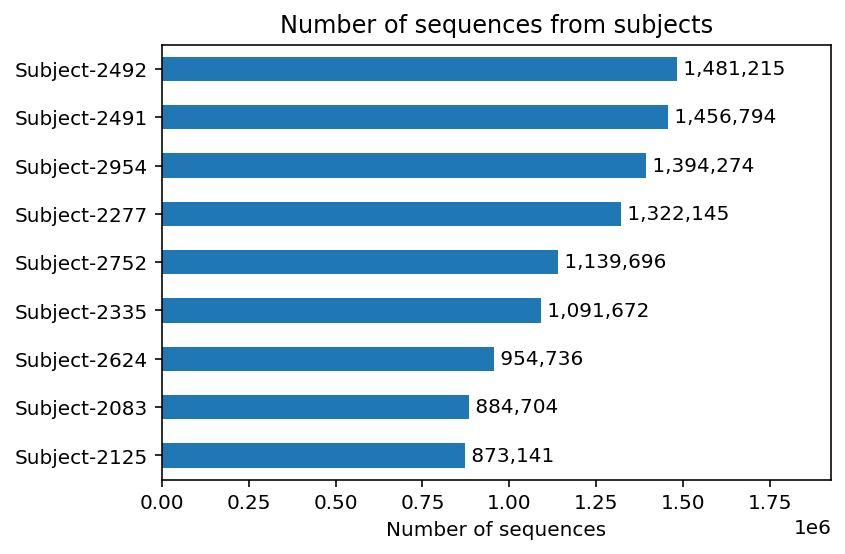

In [10]:
from bin.plotting import barplot

ax = barplot(data['Subject'].value_counts(), title='Number of sequences from subjects');
ax.set(xlabel='Number of sequences');

### Sequences lengths

In [11]:
import seaborn as sns
import numpy as np

def lengths_plot(data, target, title):
    lengths = data[target].str.len()

    ax = sns.distplot(lengths, bins=np.arange(lengths.min(), lengths.max() + 1), kde_kws={'bw':1})
    ax.set_title(title)
    ax.set(xlabel='Length')

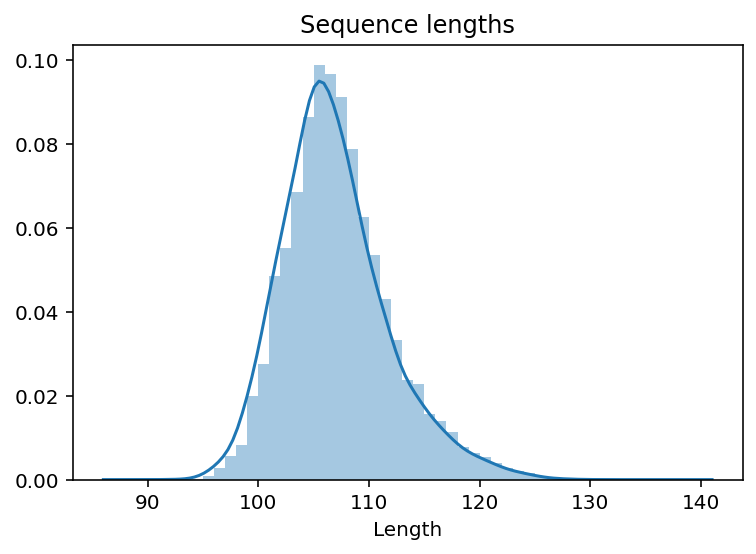

In [12]:
lengths_plot(data, 'seq', 'Sequence lengths')

In [13]:
from matplotlib import pyplot as plt

def for_each_length_plots(df, for_each_col, target, title):
    for_each_values = df[for_each_col].unique()

    for for_each in for_each_values:
        lengths_plot(df[df[for_each_col] == for_each],  target, title.format(for_each))
        plt.show()

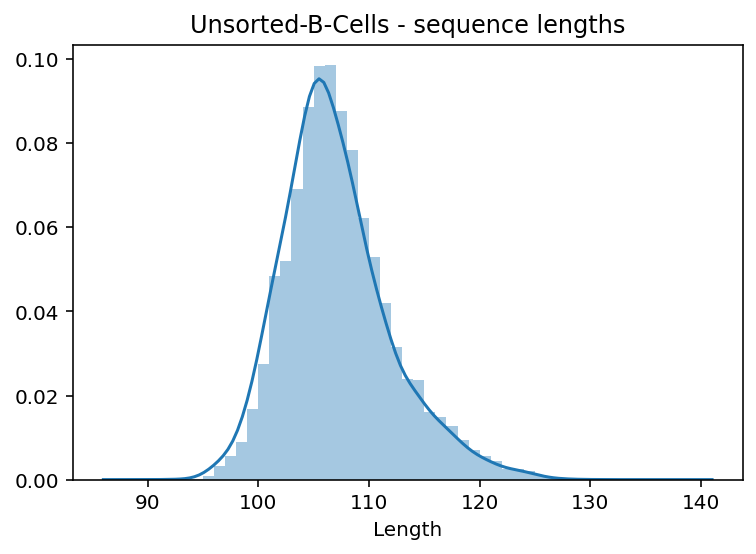

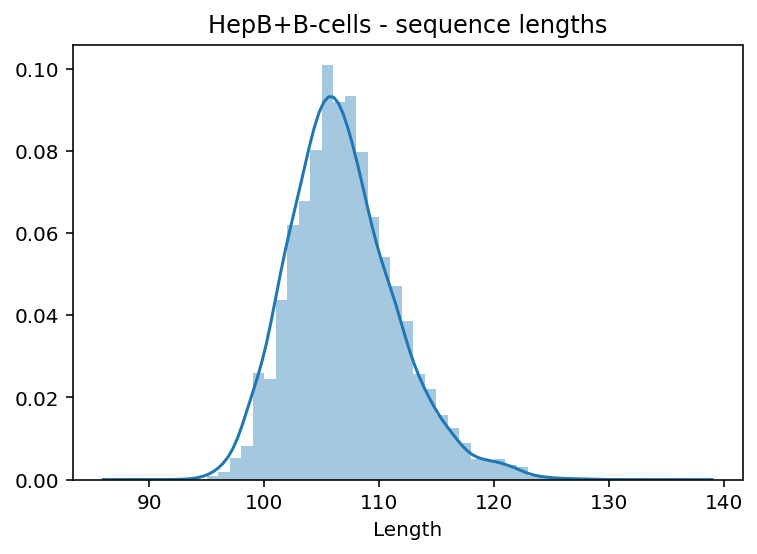

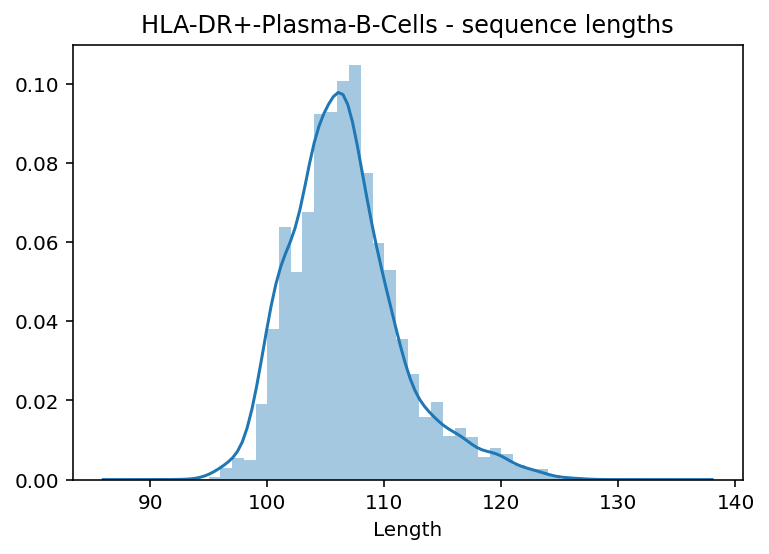

In [14]:
for_each_length_plots(data, 'BType', 'seq', '{} - sequence lengths')

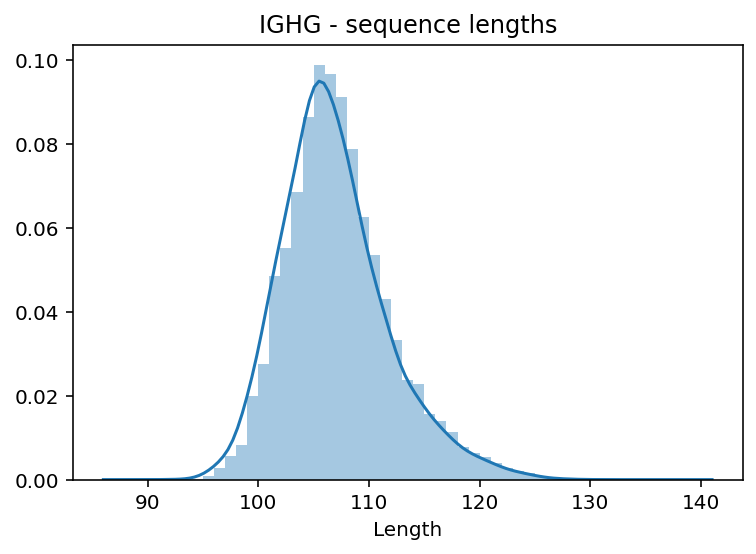

In [15]:
for_each_length_plots(data, 'Isotype', 'seq', '{} - sequence lengths')

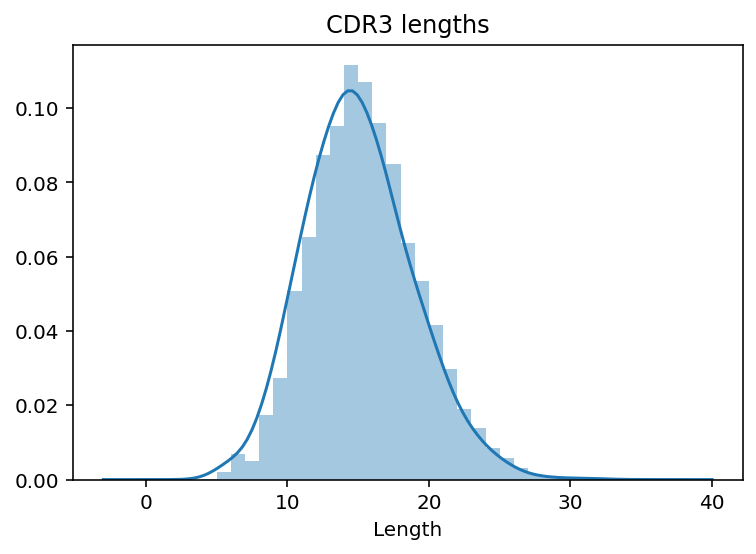

In [16]:
lengths_plot(data, 'cdr3', 'CDR3 lengths')

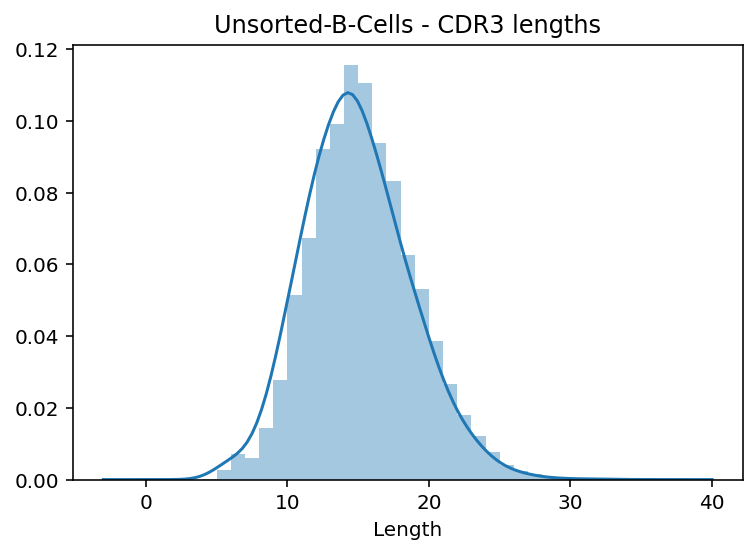

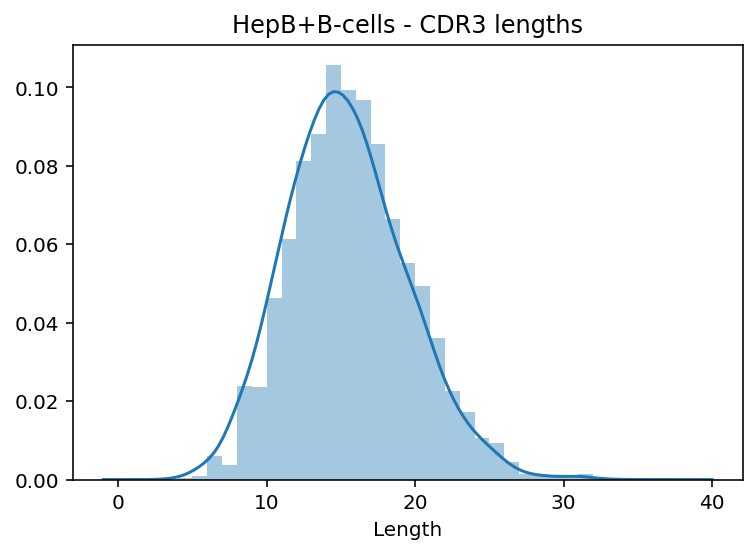

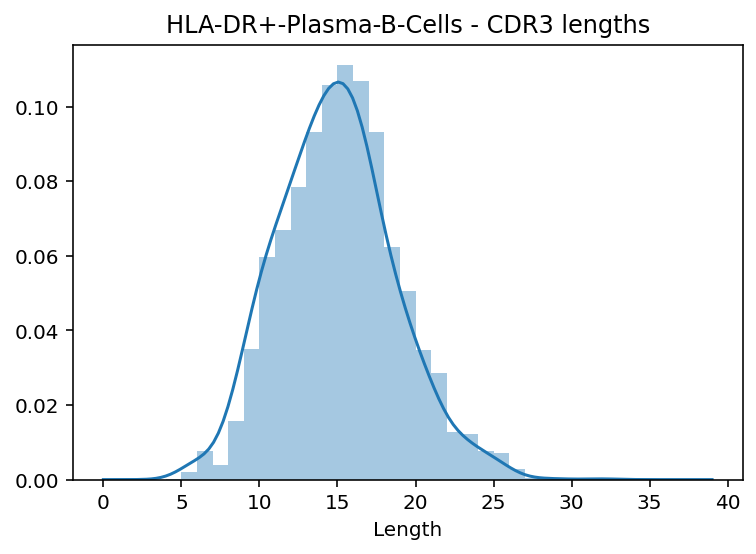

In [17]:
for_each_length_plots(data, 'BType', 'cdr3', '{} - CDR3 lengths')

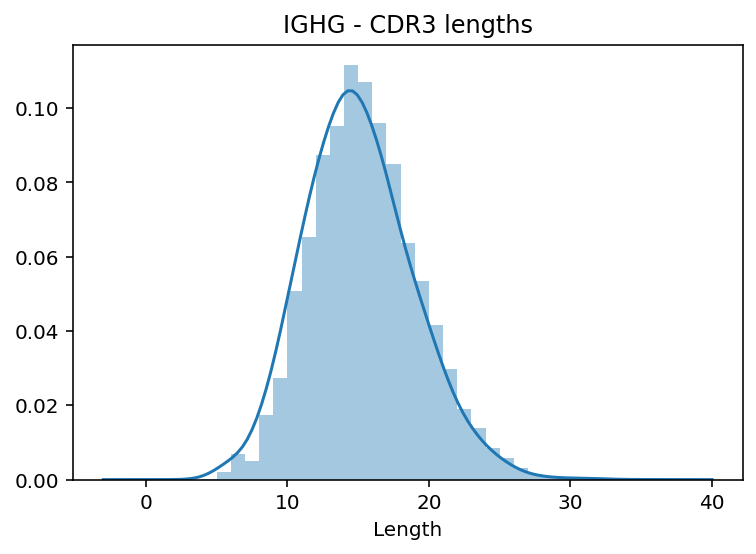

In [18]:
for_each_length_plots(data, 'Isotype', 'cdr3', '{} - CDR3 lengths')

### B-cell labels

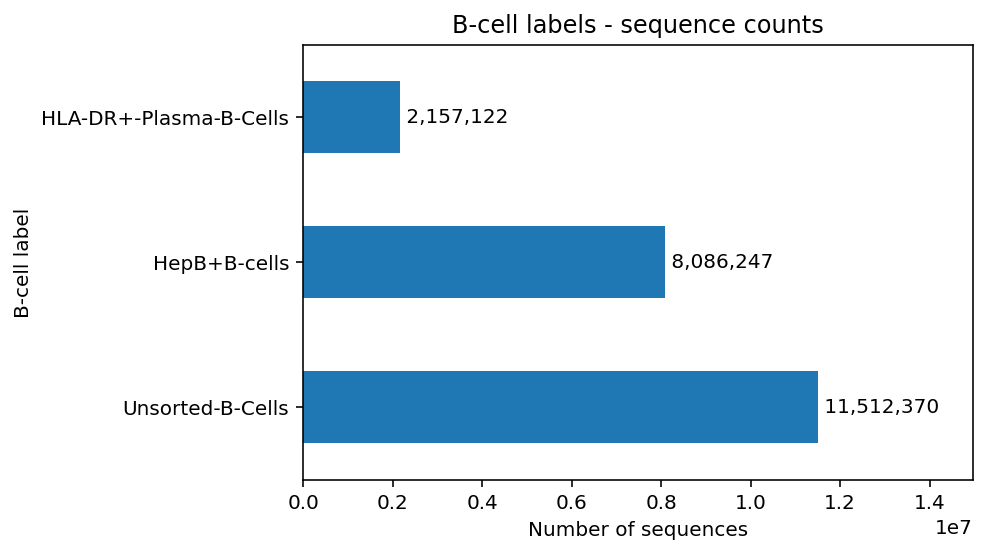

In [19]:
ax = barplot(metadata.groupby('BType')['Size'].sum(), title='B-cell labels - sequence counts');
ax.set(ylabel='B-cell label', xlabel='Number of sequences');

In [20]:
def count_plots(data, for_each_col, target, groupby_col):
    for_each_unique_values = sorted(data[for_each_col].unique())

    for for_each_val in for_each_unique_values:
        data_to_plot = data[data[for_each_col] == for_each_val].groupby(groupby_col)[target].sum()
        ax = barplot(data_to_plot, title=f'{for_each_val} - {groupby_col} counts');
        ax.set(xlabel='Number of sequences');
        plt.show()

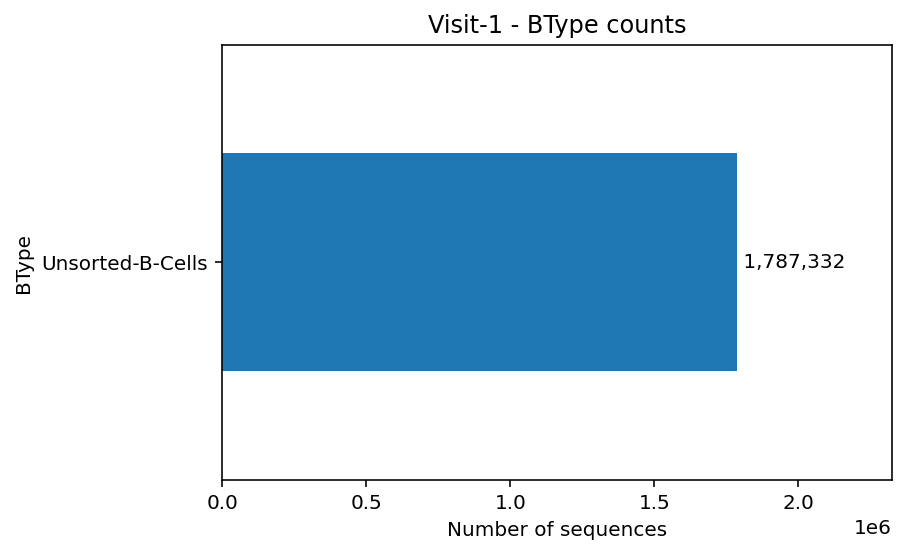

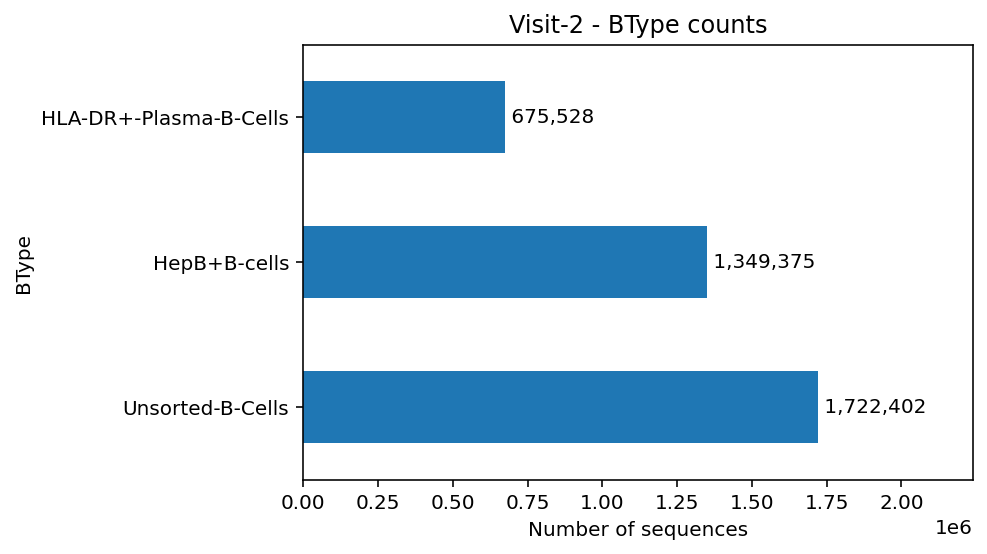

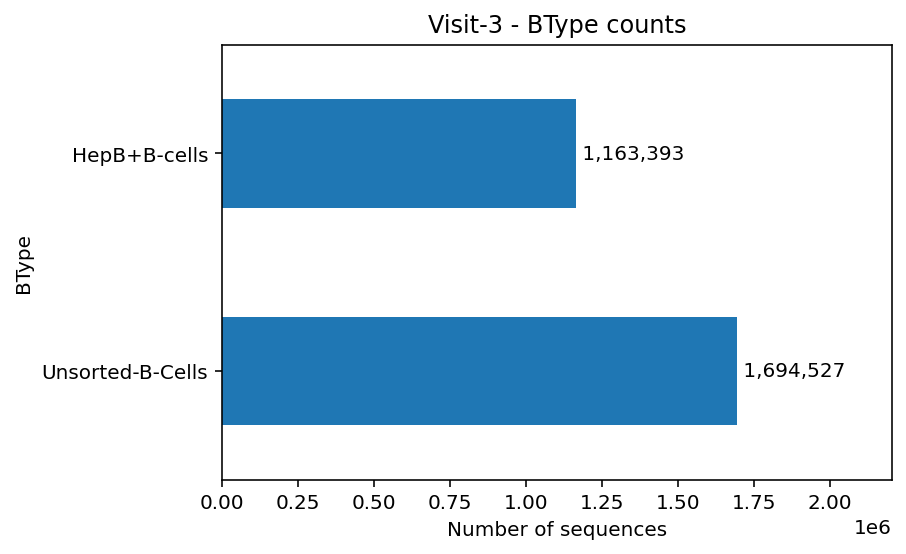

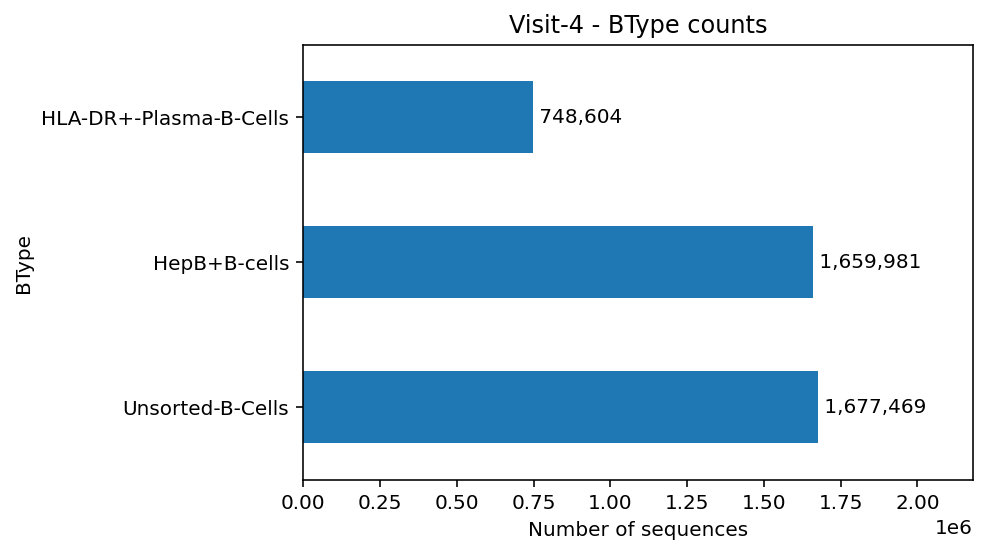

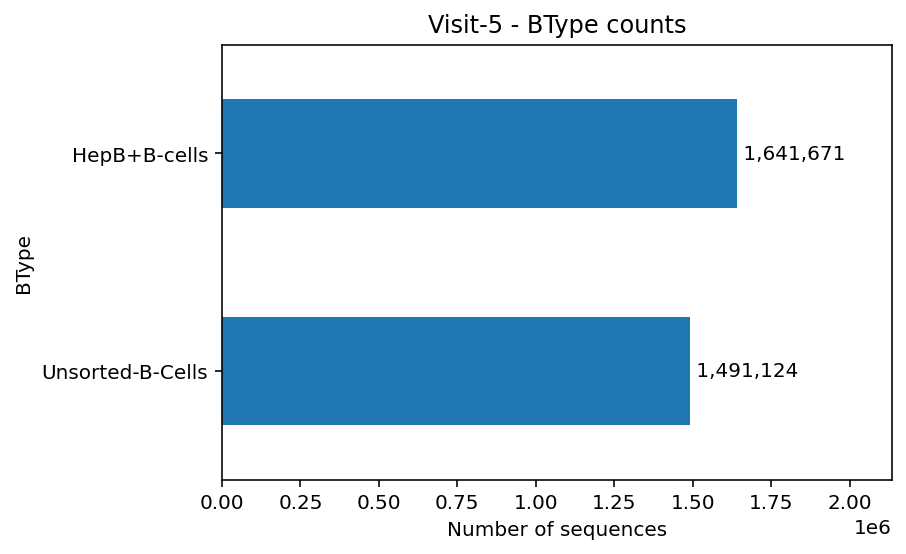

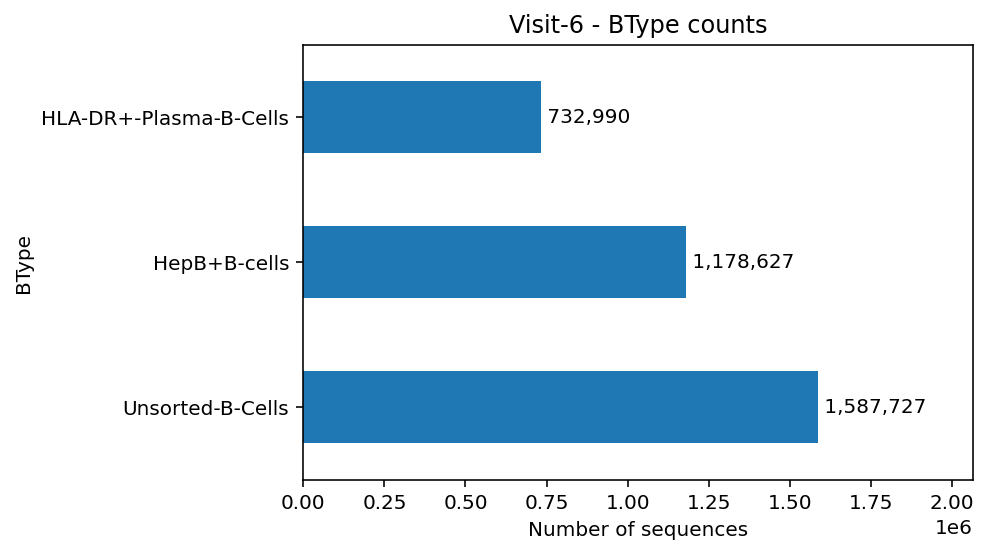

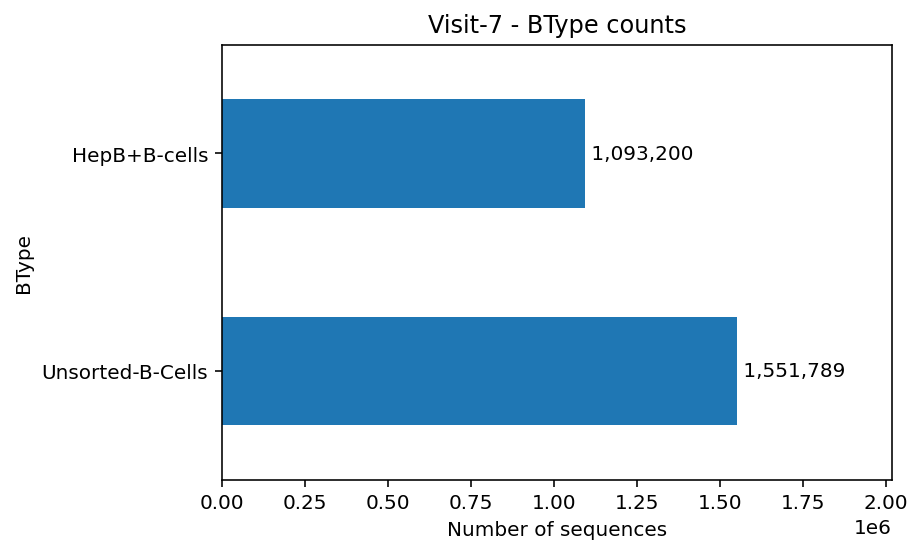

In [21]:
count_plots(metadata, 'Longitudinal', 'Size', 'BType')

### Subjects visits

In [22]:
def subject_visits_overview(df):
    df_groupby_subject = df.groupby('Subject')
    
    display(df_groupby_subject['Longitudinal'].unique())
    ax = barplot(df_groupby_subject['Longitudinal'].nunique(), title='Number of visits for subjects')
    ax.set(xlabel='Number of visits');

Subject
Subject-2083    [Visit-2, Visit-3, Visit-4, Visit-5, Visit-7, ...
Subject-2125    [Visit-1, Visit-3, Visit-4, Visit-5, Visit-7, ...
Subject-2277    [Visit-6, Visit-2, Visit-7, Visit-3, Visit-1, ...
Subject-2335    [Visit-7, Visit-3, Visit-2, Visit-5, Visit-6, ...
Subject-2491    [Visit-5, Visit-4, Visit-6, Visit-2, Visit-7, ...
Subject-2492    [Visit-4, Visit-5, Visit-7, Visit-2, Visit-6, ...
Subject-2624    [Visit-2, Visit-6, Visit-3, Visit-4, Visit-7, ...
Subject-2752    [Visit-2, Visit-4, Visit-6, Visit-7, Visit-5, ...
Subject-2954    [Visit-7, Visit-4, Visit-2, Visit-3, Visit-5, ...
Name: Longitudinal, dtype: object

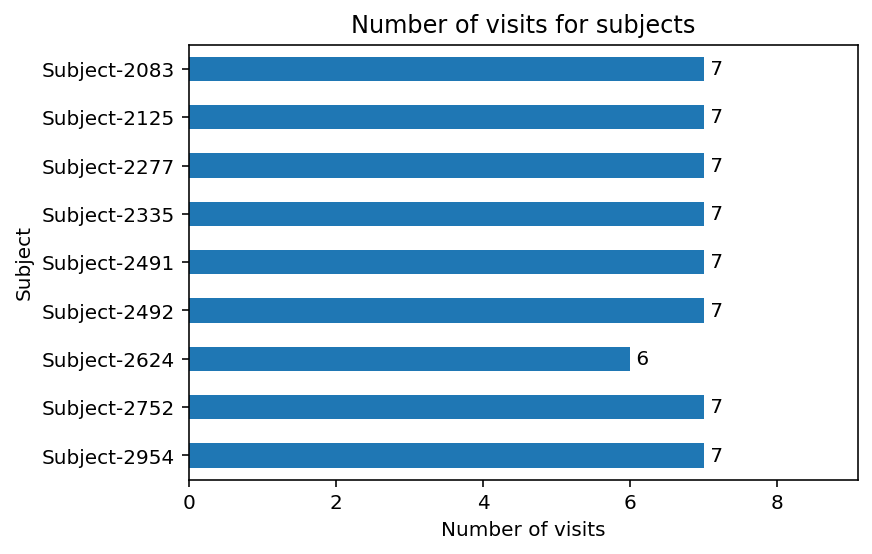

In [23]:
subject_visits_overview(data)

### hepB antibodies count

In [24]:
def subject_hepb_counts(df):
    df_groupby_subject = df.groupby('Subject')
    HEBP_TYPE = 'HepB+B-cells'
    ncols = 3
    nrows = int(np.ceil(df_groupby_subject.ngroups / ncols))
    
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows), sharey=True)

    for (key, ax) in zip(df_groupby_subject.groups.keys(), axes.flatten()):
        subject = df_groupby_subject.get_group(key)

        visit_values = sorted(subject['Longitudinal'].unique())
        hepb_cnts = [len(subject[(subject['Longitudinal'] == visit) & (subject['BType'] == HEBP_TYPE)]) for visit in visit_values]

        sns.pointplot(visit_values, hepb_cnts, ax=ax)
        ax.set(title=key, ylabel='hepB ABs (symlog)', yscale='symlog')

    plt.tight_layout()
    plt.show()

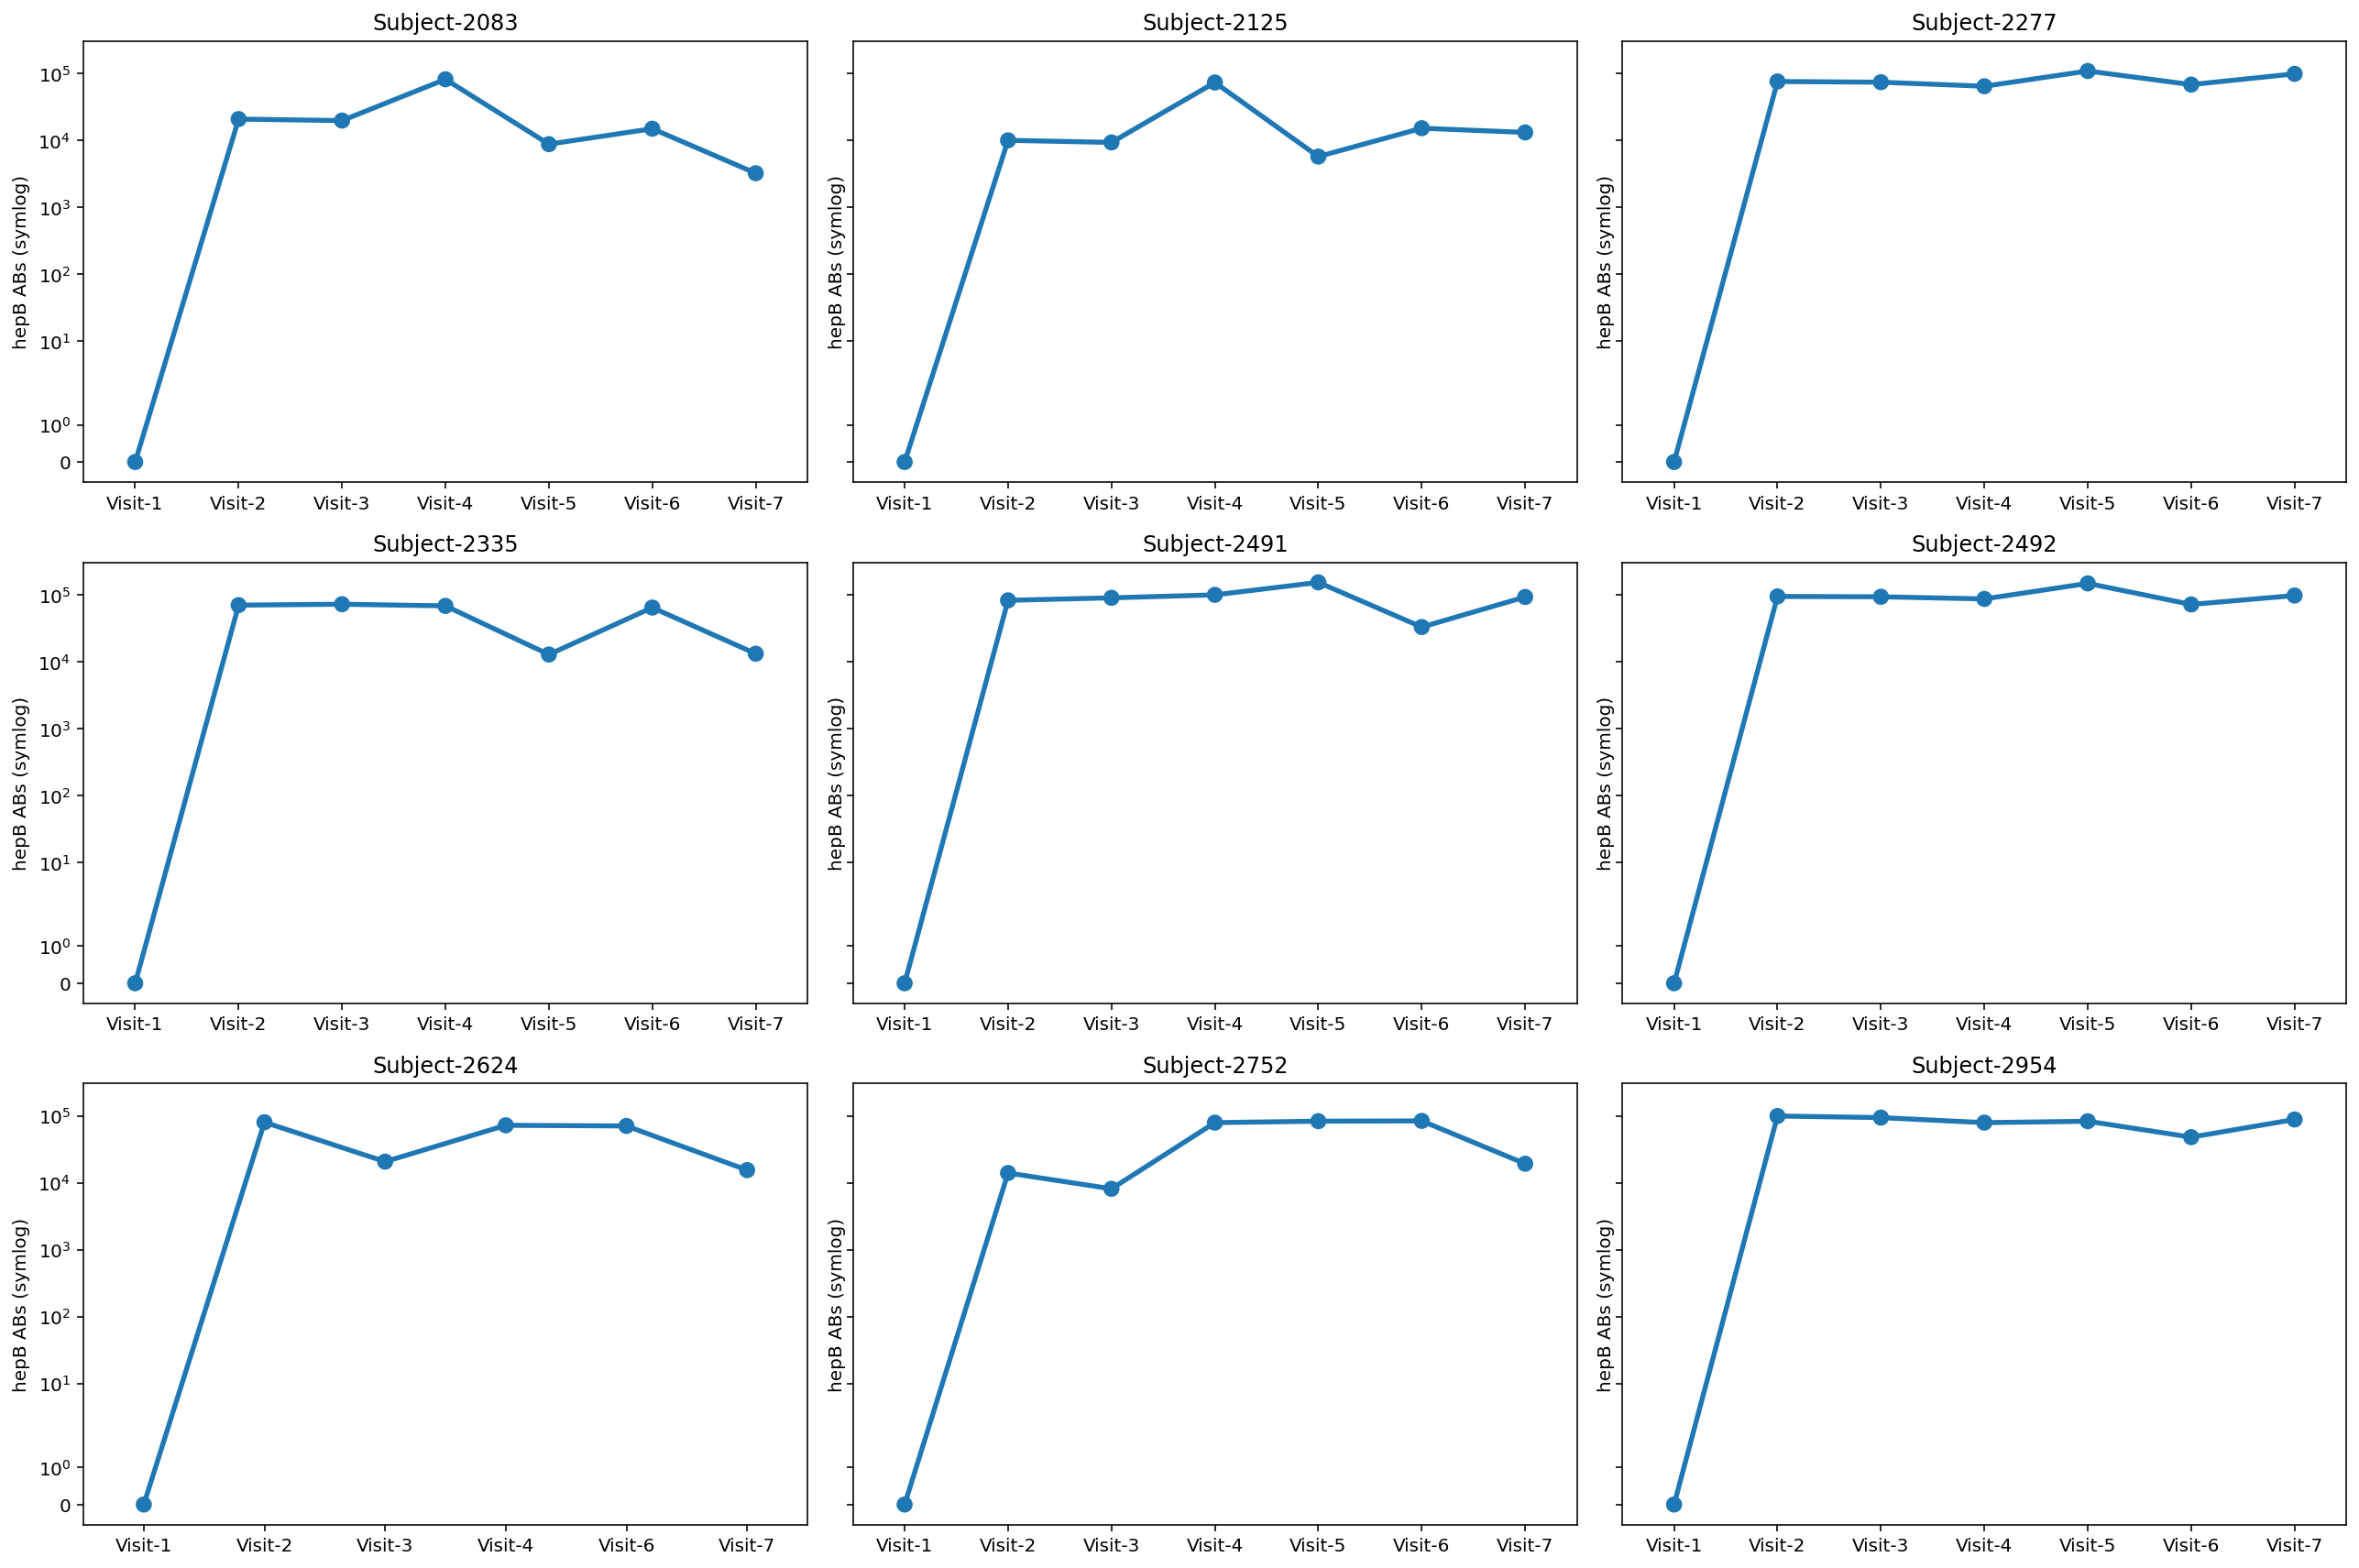

In [25]:
subject_hepb_counts(data)